**Here's what we'll be covering in this lesson:**

* How to measure the performance of our model
  * Using FLOPs as a performance metric
  * Using MACs as a performance metric
* How to use efficient layers in our model
  * Separable Convolutions
  * Pooling Layers
* How to use OpenVINO to measure the layerwise performance
* Model pruning

# Calculating Model FLOPs: Dense Layers

* In conclusion, to calculate the total MACs in a dense layer, we need to multiply the total number of neurons in the input to that layer by the number of neurons in the output of that layer. This means that the more neurons or parameters these layers have, the more computation will have to be performed.

* This can be problematic especially when you have to execute the first dense layer after flattening the output of a convolutional layer.

# Calculating Model FLOPS: Convolutional Layers

* Output shape=(Input shape - kernel shape)+1
* To generate 128,8x8 feature maps  from one 10X10 RGB image,we have to use 128,3X3X3 filters or kernels
* Total MACs=128X3X3X3X8X8
* FLops= 2 X Total MACs

Inference time calculation=FLOPs/FLOPS

QUESTION 1 

**Below is an image of a 7x7x9 (HxWxD) kernel being applied to a 25x25x9 feature map. Can you calculate the output shape of this convolutional layer?**

answer:16X16X1

QUESTION 2

**The image below is the same convolutional layer as the last quiz. However, this time, instead of applying just one filter, 64 filters are applied. Can you calculate the output shape of this convolutional layer?**

answer: 16X16X64

****

**FLOPs** `stands for floating-point operations and refers to a quantity.`

**FLOPS** `stands for floating-point operations and refers to a rate.`

|PHRASE|**QUANTITY OR RATE?**|
|-----|-----|
|100 MACs|quantity|
|100 FLOPS|rate|
|100 FLOPs|quantity|


# Calculate the FLOPs in a model


Now that you know how to calculate the FLOPs for different layers in a model, let’s try to calculate the number of FLOPs in a simple neural network.

The architecture of the model is like this:

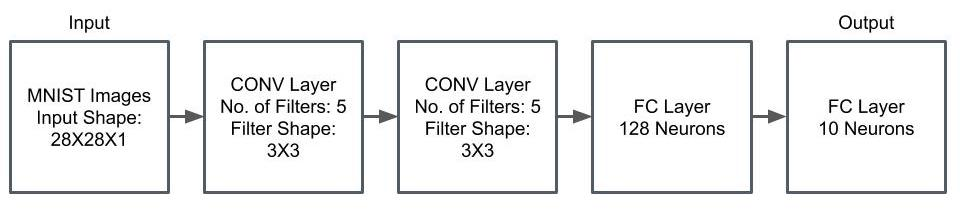

In [4]:
from IPython.display import Image
Image(filename='l3-slides.jpg')

We will refer to this architecture as base_cnn. The model will take as input MNIST images whose height and width are 28 pixels each. These images have a depth of 1. We will feed them as input to a convolutional layer with 5 kernels each of shape 3x3. This is followed by a similar convolutional layer. After the convolutional layer, there is a fully connected layer with 128 neurons. And finally we have an output layer with 10 neurons.

QUESTION 1 OF 6

**Can you calculate the output shape for the first convolutional layer?**
Answer:

QUESTION 2 OF 6

**Can you calculate the total FLOPs for the first convolutional layer?**
(The values in choices are approximate values where K stands for thousand.)
Answer:

QUESTION 3 OF 6

**Can you calculate the output shape for the second convolutional layer?**
Answer:

QUESTION 4 OF 6

**Can you calculate the total FLOPs for the second convolutional layer?**
(The values in choices are approximate values where K stands for thousand.)
Answer:

QUESTION 5 OF 6

**Can you calculate the total FLOPs for the first fully connected layer?**
(The values in choices are approximate values where K stands for thousand.)
Answer:

QUESTION 6 OF 6

**Can you calculate the total number of FLOPs for the last fully connected layer?**
(The values in choices are approximate values where K stands for thousand.)
Answer:

# Using Efficient Layers: Pooling Layers

`Number of weights in a convolutional layer is lesser than the number of weights in a fully connected layer, the convolutional layer requires more MACs to execute. `

The first type of efficient layer we will be looking at is the pooling layer.

**`Pooling layers are subsampling layers that reduce the amount of data or parameters being passed from one layer to another.`**
* The two most commonly used pooling layers are `average pooling and max pooling`.

* `An` **over-parameterized model** `is one where the number of parameters in the network is greater than what is needed to train the model on the data.`
  * Neural networks are generally over-parameterized. For instance, `there can be more layers, filters, or neurons than actually required`. These extra parameters cause an increase in inference time. 

* The `problem with pooling layers` is that while they reduce the number of FLOPs, they also reduce the amount of data being sent from one layer to another.

# Using Efficient Layers: Separable Convolutions

* We just saw how to reduce the number of parameters flowing through our model by using pooling layers. `Pooling layers allow us to reduce the operations in our model without using too many FLOPs. But at the same time, a lot of data gets lost.`


* While using pooling layers does solve the problem of having a lot of parameters, it does not attack the problem at its source: the convolutional layer. On this page, we will see `how we can reduce the number of operations in a convolutional layer without changing the input and output shape of the layer`.

**`A separable convolution is a convolutional layer that divides the standard convolutional layer into two layers: a depthwise convolution and a pointwise convolution. By doing so, the number of FLOPs or operations required to run the model is reduced.`**

# Model Pruning

Neural networks are usually trained with a lot of layers and parameters. Often times, many of these parameters and weights are redundant and do not contribute much to the accuracy of the network. Removing these weights can help us improve performance without affecting our accuracy.

`Pruning is a model compression technique where redundant network parameters are removed while trying to preserve the original accuracy (or other metric) of the network`

* Model pruning to reduce redundant weights,reducing weights reduces the memory requirements of our model and can also reduce the computation requirements. However, the reduction in FLOPs is a by-product of reducing weights.